In [134]:
# !pip install seaborn
# !pip install matplotlib
# !pip install plotly_express

In [135]:
# Importing all the required libraries and modules.
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly_express as ple
import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [136]:
# Loading the dataset into pandas dataframe.
df = pd.read_csv("backloggd_games.csv")

In [137]:
# Checking the first five rows of the data.
df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [138]:
# Checking the last five rows of the data.
df.tail()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
59995,59995,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0
59996,59996,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1
59997,59997,Sainth,"Apr 11, 2008",['Neo Kuriyo'],"Years after the events of ""Wraith"", a young gi...",['Windows PC'],[],NaN,1,0,0,2,0,0
59998,59998,Dragon Spirits,"Apr 25, 2023","['FHNBHJ', 'indienova']",While constantly working on a video game witho...,['Windows PC'],['RPG'],NaN,2,0,1,5,3,0
59999,59999,Pathfinder: Kingmaker - Definitive Edition,"Aug 18, 2020","['Owlcat Games', 'Deep Silver']",The Definitive Edition will have all of the DL...,"['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7,9,0,19,1,7,1


In [139]:
# Checking the shape fo the data.
df.shape

(60000, 14)

In [140]:
# Checking the null values in our dataset.
df.isnull().sum()

Unnamed: 0          0
Title               0
Release_Date        0
Developers          0
Summary          4954
Platforms           0
Genres              0
Rating          34595
Plays               0
Playing             0
Backlogs            0
Wishlist            0
Lists               0
Reviews             0
dtype: int64

In [141]:
# Checking the detailed statistics of the numerical data in our dataset.
df.describe()

,Unnamed: 0,Rating
count,60000.000000,25405.000000
mean,29999.500000,3.033171
std,17320.652413,0.735573
min,0.000000,0.300000
25%,14999.750000,2.600000
50%,29999.500000,3.100000
75%,44999.250000,3.500000
max,59999.000000,5.000000


In [142]:
# Checking the information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [143]:
# Removing the unnecessary "unnamed: 0" column
df = df.drop(columns=['Unnamed: 0'])

In [144]:
# Removing the game whose rating is smaller than 0.5. As, the least rating of the game cannot be less than 0.5
df = df[df['Rating'] >= 0.5]

In [145]:
# Removing data whose release date is "TBD". As, these data are not relevant to our project.
df = df[df['Release_Date'] != "TBD"]

In [146]:
# Converting the Release_Date string data to date.
df['Release_Date'] = [pd.to_datetime(date) for date in df['Release_Date']]

In [147]:
# The data was collected in mid-June 2023, so we also removed the games which will be released after mid-june. 
# As, it will not contain the data that we will require in our project.
df = df[df["Release_Date"] < pd.to_datetime("2023-06-15")]

In [148]:
# Getting only the release year of the game.
def get_release_year(date):
        return pd.to_datetime(date).year
df['Release_Year'] = df['Release_Date'].apply(get_release_year)
df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Year
0,Elden Ring,2022-02-25,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K,2022
1,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K,2017
2,Hades,2018-12-07,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K,2018
3,Hollow Knight,2017-02-24,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K,2017
4,Undertale,2015-09-15,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K,2015


In [149]:
# Calculating the age of the game.
df['Age_Of_Game'] = df.apply(lambda x: datetime.datetime.now().year - x['Release_Year'], axis=1)

In [150]:
# Handling the missing values.
print("Mean before imputation", df['Rating'].mean())
print("Median before imputation", df['Rating'].median())

print(df.shape)

# Dropping the null rows of the dataset.
df = df.dropna()
print(df.shape)

# Imputing the null values of the rating column with the mean value
# df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Using KNN Imputer to impute the null rating of the games.
# imputer = KNNImputer(n_neighbors = 5)
# df['Rating'] = imputer.fit_transform(df[['Rating']])

print("Mean after imputation", df['Rating'].mean())
print("Median after imputation", df['Rating'].median())

Mean before imputation 3.0319589289309445
Median before imputation 3.1
(24835, 15)
(24397, 15)
Mean after imputation 3.033053244251342
Median after imputation 3.1


In [151]:
# Aggregating all the genres into 4 major genres. 
df["Aggregated_Genres"] = "Other"
df.loc[df["Genres"].str.contains("Adventure|Platform|Puzzle"), "Aggregated_Genres"] = "Adventure"
df.loc[df["Genres"].str.contains("Simulator|Strategy"), "Aggregated_Genres"] = "Strategy"
df.loc[df["Genres"].str.contains("Fighting|Shooter"), "Aggregated_Genres"] = "Action"
df['Aggregated_Genres'].unique()

array(['Adventure', 'Strategy', 'Action', 'Other'], dtype=object)

In [152]:
# Changing the data representation of engagement metrics with their respective numeric values.
def changenumbertothousand(data):
    if 'K' in data:
        return int(int(re.findall(r"[0-9]+", data)[0]) * 1000)
    else:
        return int(data)

df['Plays'] = df['Plays'].apply(changenumbertothousand)
df['Playing'] = df['Playing'].apply(changenumbertothousand)
df['Backlogs'] = df['Backlogs'].apply(changenumbertothousand)
df['Wishlist'] = df['Wishlist'].apply(changenumbertothousand)
df['Lists'] = df['Lists'].apply(changenumbertothousand)
df['Reviews'] = df['Reviews'].apply(changenumbertothousand)

In [153]:
# Count the number of Developers, Genres, Platforms for the given game.
def countvalue(inputarray):
    count = 0
    inputarraysplit = inputarray.split(',')
    for i in inputarraysplit:
        count += 1
    return count

df['Number_Of_Developers'] = df['Developers'].apply(countvalue)
df['Number_Of_Genres'] = df['Genres'].apply(countvalue)
df['Number_Of_Platforms'] = df['Platforms'].apply(countvalue)
df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Year,Age_Of_Game,Aggregated_Genres,Number_Of_Developers,Number_Of_Genres,Number_Of_Platforms
0,Elden Ring,2022-02-25,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000,4000,5000,5000,4000,3000,2022,1,Adventure,2,2,5
1,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000,3000,5000,3000,5000,3000,2017,6,Adventure,2,2,2
2,Hades,2018-12-07,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000,3000,7000,4000,3000,2000,2018,5,Adventure,1,4,7
3,Hollow Knight,2017-02-24,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000,2000,9000,2000,3000,2000,2017,6,Adventure,1,3,4
4,Undertale,2015-09-15,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000,728,5000,2000,3000,2000,2015,8,Strategy,2,4,7


In [154]:
df.describe().round(2)

,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Year,Age_Of_Game,Number_Of_Developers,Number_Of_Genres,Number_Of_Platforms
count,24397,24397.00,24397.00,24397.00,24397.00,24397.00,24397.00,24397.00,24397.00,24397.00,24397.00,24397.00,24397.00
mean,2010-06-03 04:04:21.474771456,3.03,467.92,14.94,118.78,59.69,66.75,28.01,2009.86,13.14,1.55,2.18,2.58
min,1952-12-31 00:00:00,0.50,1.00,-1.00,-1.00,0.00,0.00,0.00,1952.00,0.00,1.00,1.00,1.00
25%,2003-11-10 00:00:00,2.60,11.00,0.00,4.00,2.00,4.00,1.00,2003.00,5.00,1.00,1.00,1.00
50%,2013-02-22 00:00:00,3.10,37.00,1.00,14.00,7.00,11.00,3.00,2013.00,10.00,2.00,2.00,2.00
75%,2018-06-14 00:00:00,3.50,203.00,4.00,66.00,32.00,45.00,13.00,2018.00,20.00,2.00,3.00,3.00
max,2023-06-13 00:00:00,5.00,38000.00,4000.00,9000.00,5000.00,5000.00,3000.00,2023.00,71.00,5.00,10.00,21.00
std,NaN,0.73,1778.04,86.44,380.10,197.18,187.13,100.83,10.04,10.04,0.54,1.17,2.02


In [155]:
# Filtering out the values which are not normal for the given column.
df = df[df['Plays'] >= 0]
df = df[df['Playing'] >= 0]
df = df[df['Backlogs'] >= 0]

In [156]:
# Calculating the total engagements of the games.
def calcualteTotalEngagements(df):
    result = df['Plays'] + df['Playing'] + df['Backlogs'] + df['Wishlist'] + df['Lists']
    return result

df['Total_Engagements'] = df.apply(calcualteTotalEngagements, axis = 1)

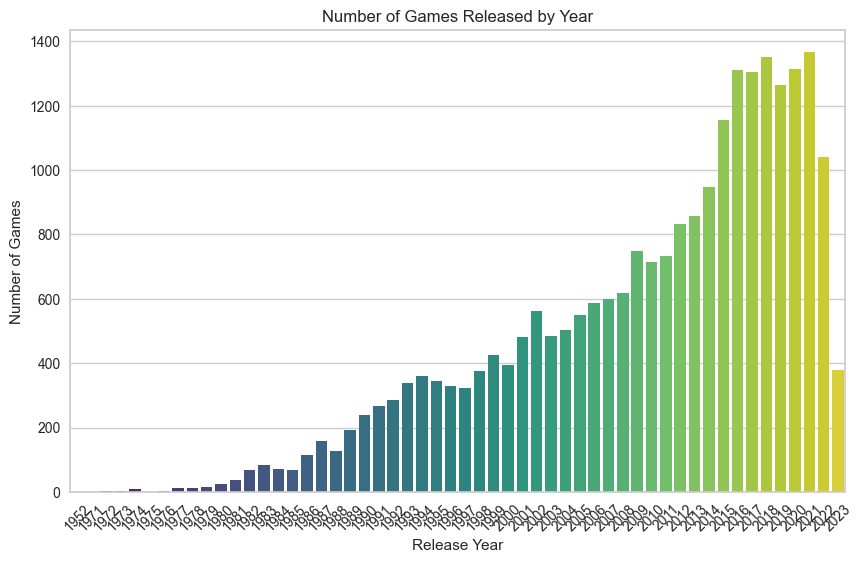

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Release_Year', palette='viridis')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Released by Year')
plt.xticks(rotation=45)
plt.show()


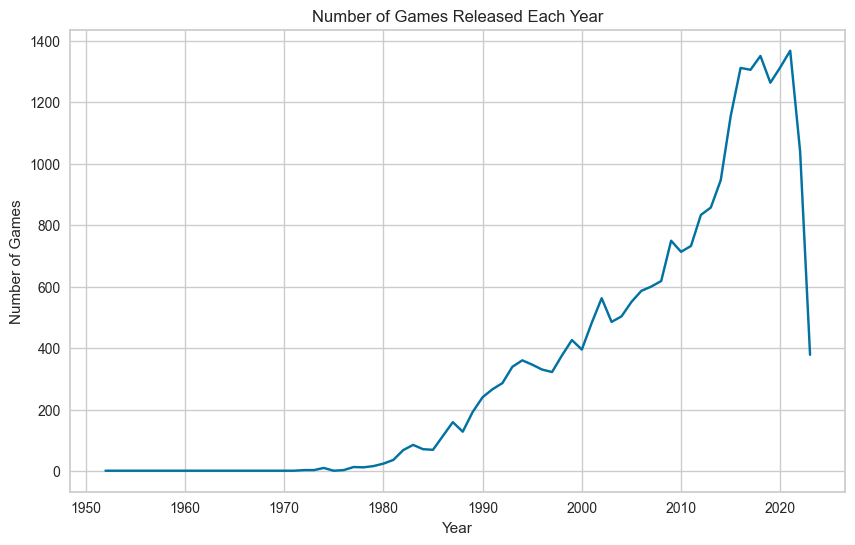

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(df['Release_Year'].value_counts().sort_index())
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Released Each Year')
plt.show()


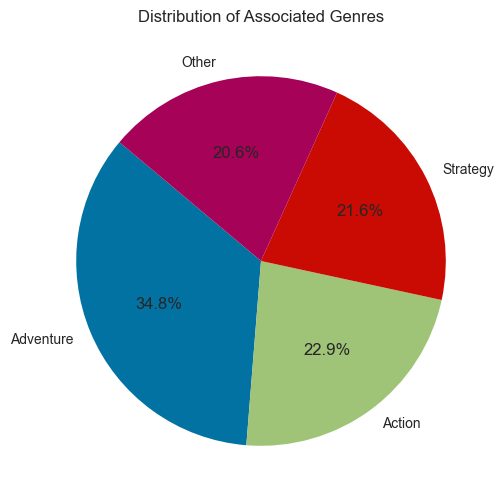

In [159]:
# Pie-chart showing the distribution of game on different associated genres.
plt.figure(figsize=(10, 6))
platform_counts = df['Aggregated_Genres'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Associated Genres')
plt.show()

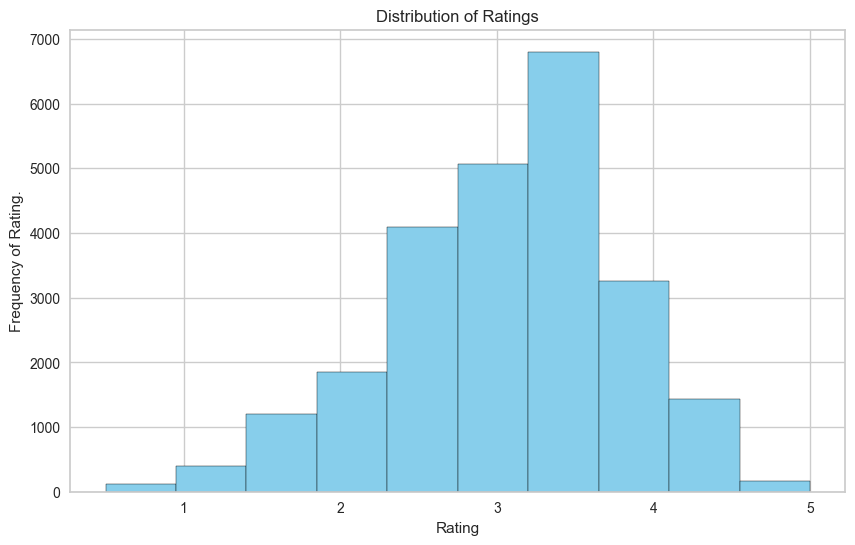

In [160]:
#Histogram showing the distribution of ratings.
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency of Rating.')
plt.title('Distribution of Ratings')
plt.show()

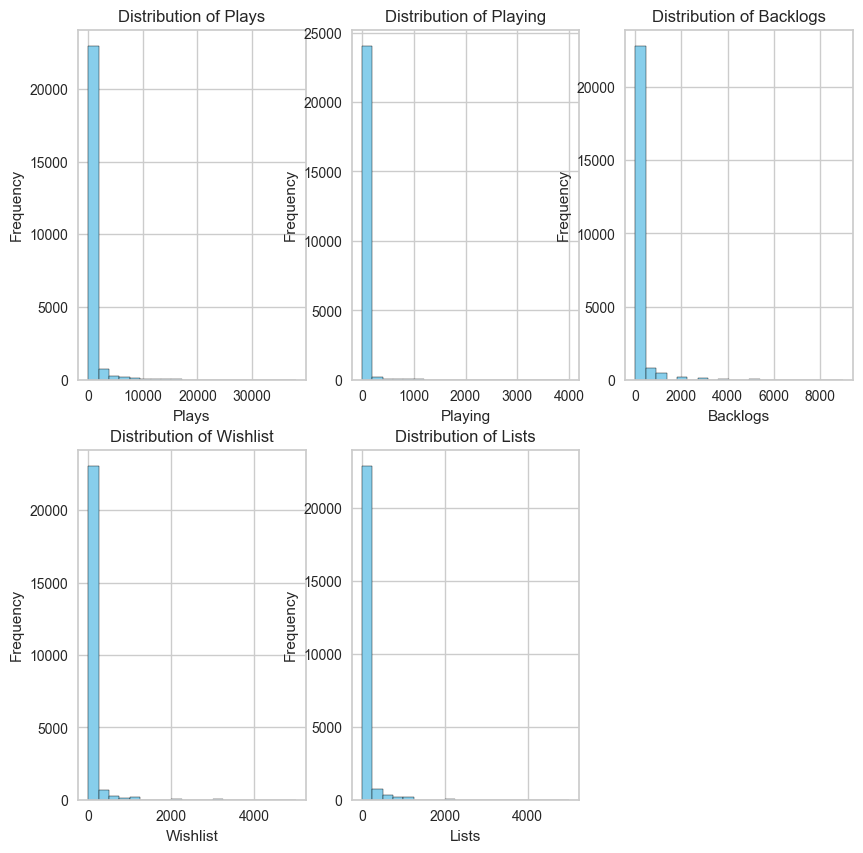

In [161]:
# Defining the engagement columns
engagement_columns = ['Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists']

# Create subplots for each feature
plt.figure(figsize=(10, 10))

for i, column in enumerate(engagement_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

plt.show()

In [162]:
#Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Encoding the categorical column and storing in the same column
df['Aggregated_Genres'] = label_encoder.fit_transform(df['Aggregated_Genres'])

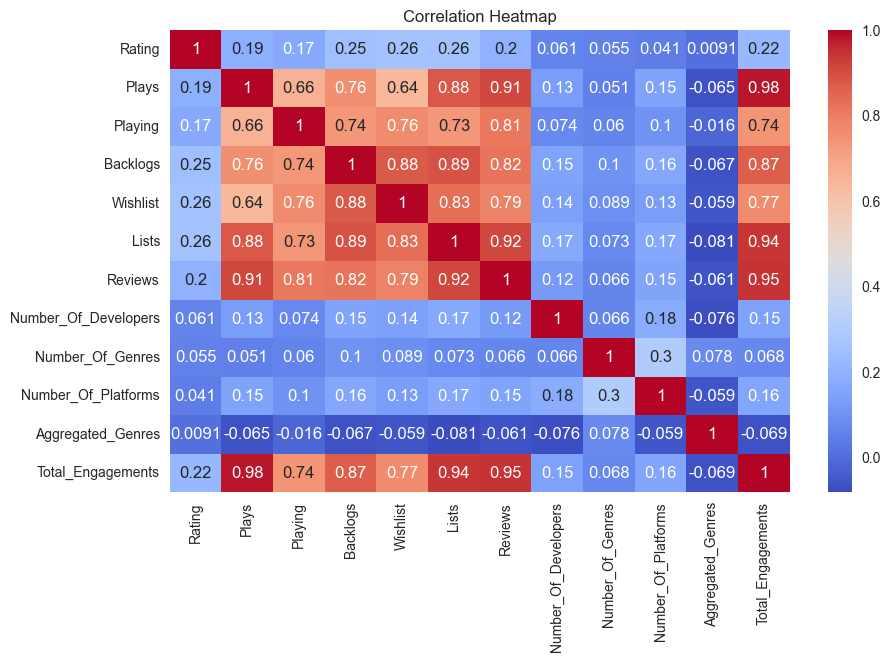

In [163]:
corr_matrix = df[["Rating", "Plays", "Playing", "Backlogs", "Wishlist", "Lists", "Reviews", "Number_Of_Developers", "Number_Of_Genres", "Number_Of_Platforms", "Aggregated_Genres", "Total_Engagements"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

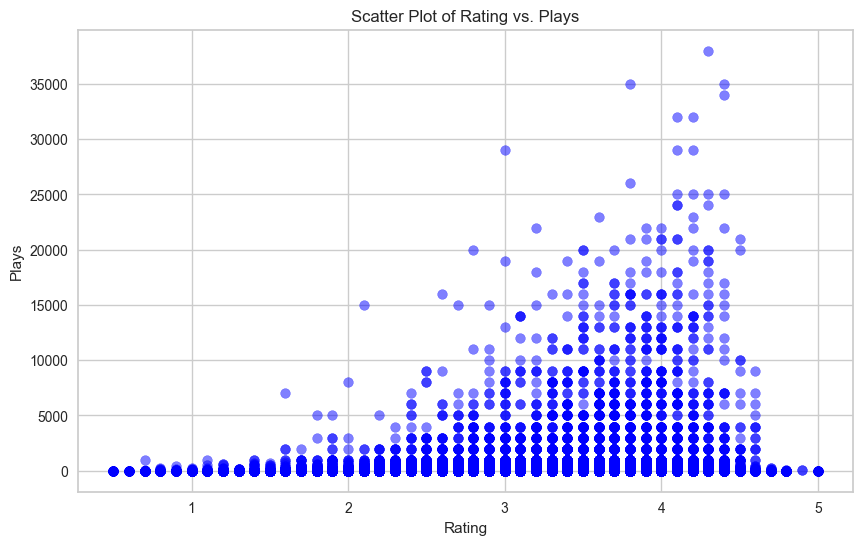

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Plays'], alpha=0.5, color='blue')
plt.xlabel('Rating')
plt.ylabel('Plays')
plt.title('Scatter Plot of Rating vs. Plays')
plt.show()

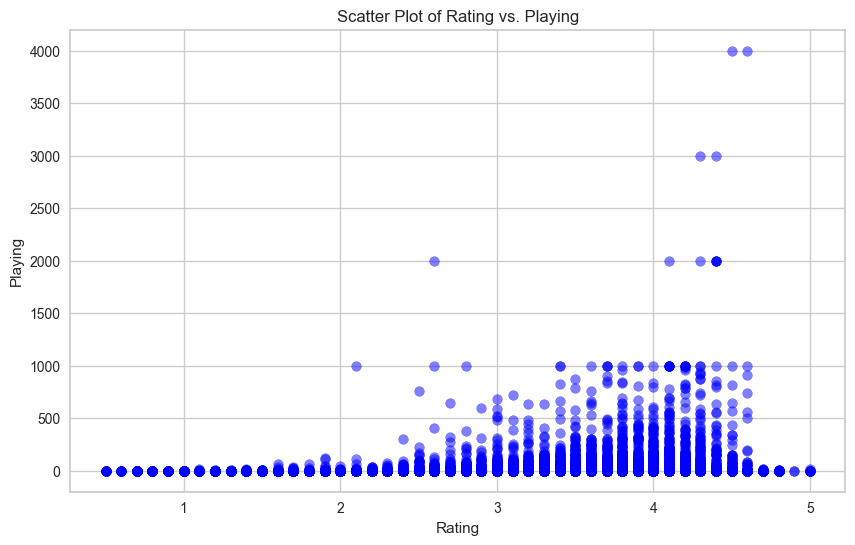

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Playing'], alpha=0.5, color='blue')
plt.xlabel('Rating')
plt.ylabel('Playing')
plt.title('Scatter Plot of Rating vs. Playing')
plt.show()

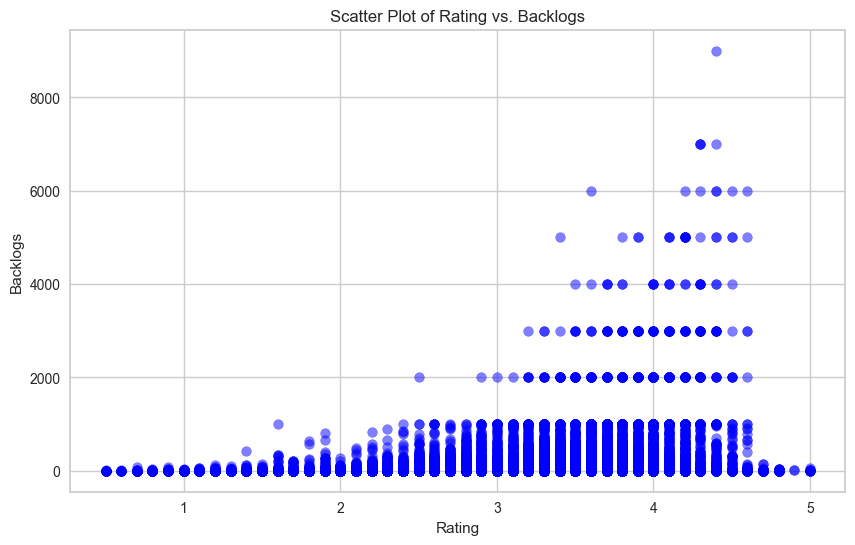

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Backlogs'], alpha=0.5, color='blue')
plt.xlabel('Rating')
plt.ylabel('Backlogs')
plt.title('Scatter Plot of Rating vs. Backlogs')
plt.show()

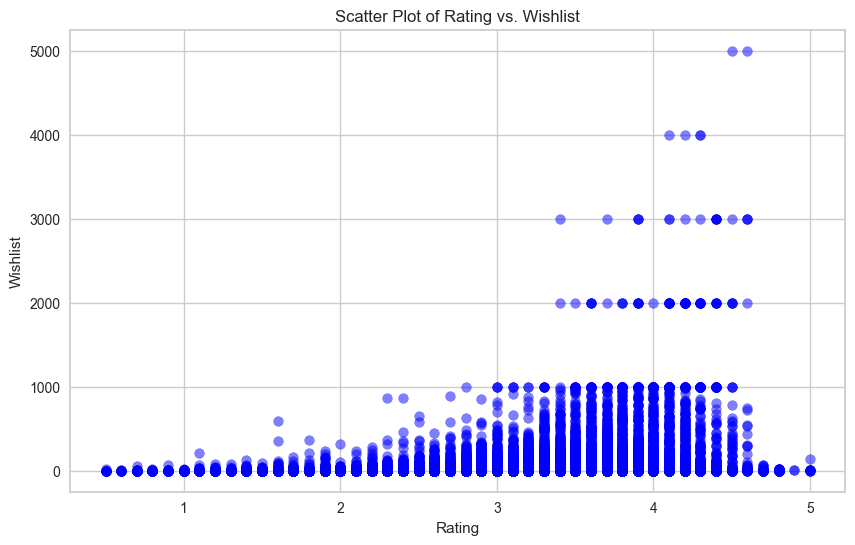

In [167]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Wishlist'], alpha=0.5, color='blue')
plt.xlabel('Rating')
plt.ylabel('Wishlist')
plt.title('Scatter Plot of Rating vs. Wishlist')
plt.show()

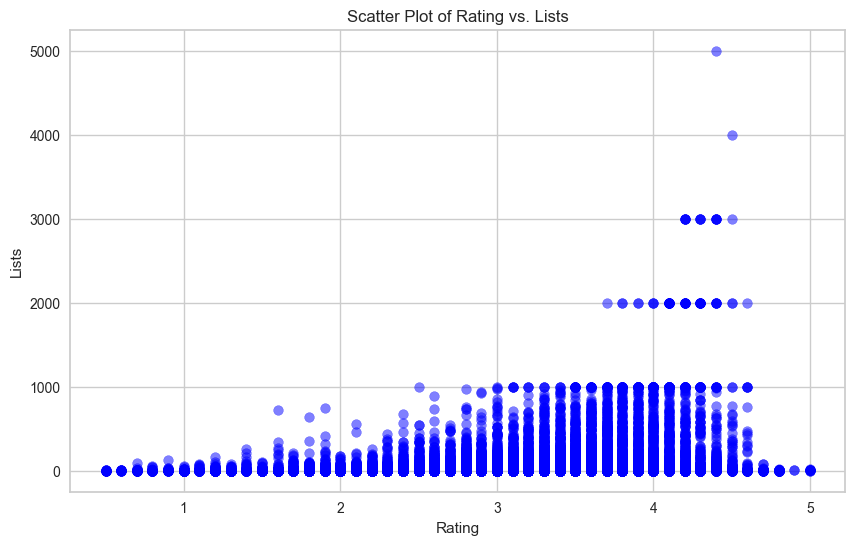

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Lists'], alpha=0.5, color='blue')
plt.xlabel('Rating')
plt.ylabel('Lists')
plt.title('Scatter Plot of Rating vs. Lists')
plt.show()

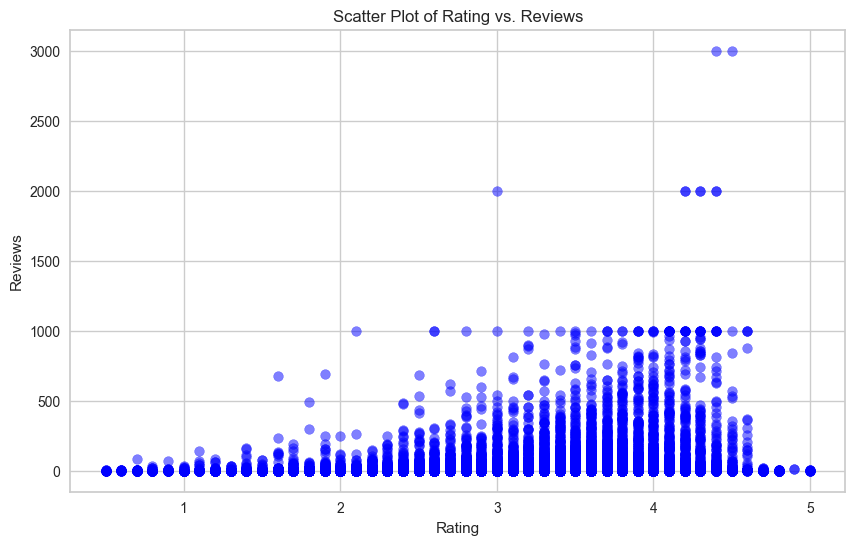

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Reviews'], alpha=0.5, color='blue')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Rating vs. Reviews')
plt.show()

In [170]:
df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Release_Year,Age_Of_Game,Aggregated_Genres,Number_Of_Developers,Number_Of_Genres,Number_Of_Platforms,Total_Engagements
0,Elden Ring,2022-02-25,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000,4000,5000,5000,4000,3000,2022,1,1,2,2,5,39000
1,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000,3000,5000,3000,5000,3000,2017,6,1,2,2,2,51000
2,Hades,2018-12-07,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000,3000,7000,4000,3000,2000,2018,5,1,1,4,7,42000
3,Hollow Knight,2017-02-24,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000,2000,9000,2000,3000,2000,2017,6,1,1,3,4,41000
4,Undertale,2015-09-15,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000,728,5000,2000,3000,2000,2015,8,3,2,4,7,42728


In [171]:
# Here we use MinMaxScaler to normalize the engagement metrics to the range of [0, 1]. 
min_max_scaler = MinMaxScaler()
numerical_columns = ['Plays','Playing','Backlogs','Wishlist','Lists','Reviews','Total_Engagements']  
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

In [172]:
# Definining the function to print the regression metrics.
def print_regression_metrics(actualdata, predicteddata):
    """
    Calculate and print various regression metrics.

    Parameters:
        actualdata (array-like): True labels.
        predicteddata (array-like): Predicted labels.
    """
       
    # Mean Squared Error (MSE)
    mse = mean_squared_error(actualdata, predicteddata)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(actualdata, predicteddata)
    
    # R-squared (R2) Score
    r2 = r2_score(actualdata, predicteddata)
    
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)

In [173]:
# Select features and target variable
features = ["Backlogs", "Wishlist", "Lists", "Playing", "Reviews", "Total_Engagements"]
target = ["Rating"]

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the model's performance
print("The regression metrics on the testing data:")
print_regression_metrics(y_test, y_pred)

C:\Users\Acer\AppData\Local\Temp\ipykernel_47284\3660576558.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


The regression metrics on the testing data:
Mean Squared Error: 0.34457907996621034
Root Mean Squared Error: 0.5870085859390903
Mean Absolute Error: 0.4184696023826399
R-squared: 0.3543412487469113


In [174]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the model's performance
print("The regression metrics on the training data:")
print_regression_metrics(y_train, y_train_pred)

The regression metrics on the training data:
Mean Squared Error: 0.07399711581979596
Root Mean Squared Error: 0.27202410889440654
Mean Absolute Error: 0.17439474323870108
R-squared: 0.8602638664340632


In [175]:
# Select features and target variable
features = ["Backlogs", "Wishlist", "Lists", "Playing", "Reviews", "Total_Engagements"]
target = ["Rating"]

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the model's performance
print("The regression metrics on the testing data:")
print_regression_metrics(y_test, y_pred)

The regression metrics on the testing data:
Mean Squared Error: 0.48851449746823983
Root Mean Squared Error: 0.6989381213442574
Mean Absolute Error: 0.551972937203731
R-squared: 0.08464071459212341


In [176]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the model's performance
print("The regression metrics on the training data:")
print_regression_metrics(y_train, y_train_pred)

The regression metrics on the training data:
Mean Squared Error: 0.4864381190133147
Root Mean Squared Error: 0.6974511588730172
Mean Absolute Error: 0.5481491517054278
R-squared: 0.08141038718939775


In [177]:
# Definining the function to print the classification metrics.
def print_classification_metrics(actualdata, predicteddata):
    """
    Calculate and print various classification metrics.

    Parameters:
        actualdata (array-like): True labels.
        predicteddata (array-like): Predicted labels.
    """
    accuracy = accuracy_score(actualdata, predicteddata)
    report = classification_report(actualdata, predicteddata)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification report:")
    print(report)

In [178]:
# Classifying the data to the Aggregated Genres using RandomForestClassifier.
X = df.drop(columns=['Title', 'Release_Date', 'Developers', 'Summary', 'Platforms', 'Genres', 'Aggregated_Genres'])
y = df['Aggregated_Genres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("The classification metrics on the testing data:")
print_classification_metrics(y_test, y_pred)

The classification metrics on the testing data:
Accuracy: 0.6407
Classification report:
              precision    recall  f1-score   support

           0       0.60      0.48      0.53      1318
           1       0.64      0.70      0.67      2202
           2       0.66      0.76      0.71      1234
           3       0.65      0.59      0.62      1344

    accuracy                           0.64      6098
   macro avg       0.64      0.63      0.63      6098
weighted avg       0.64      0.64      0.64      6098



In [179]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the model's performance
print("The classification metrics on the training data:")
print_classification_metrics(y_train, y_train_pred)

The classification metrics on the training data:
Accuracy: 0.9999
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4263
           1       1.00      1.00      1.00      6297
           2       1.00      1.00      1.00      3801
           3       1.00      1.00      1.00      3932

    accuracy                           1.00     18293
   macro avg       1.00      1.00      1.00     18293
weighted avg       1.00      1.00      1.00     18293



In [180]:
# Defining the rating categories
def categorize_rating(rating):
    if rating >= 4.0:
        return 'High'
    elif rating >= 3:
        return 'Medium'
    else:
        return 'Low'

df['Rating_Category'] = df['Rating'].apply(categorize_rating)

# Classifying the data to the rating category using RandomForestClassifier.
X = df.drop(columns=['Rating', 'Rating_Category', 'Title', 'Release_Date', 'Developers', 'Summary', 'Platforms', 'Genres', 'Aggregated_Genres'])
y = df['Rating_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("The classification metrics on the testing data:")
print_classification_metrics(y_test, y_pred)

The classification metrics on the testing data:
Accuracy: 0.7186
Classification report:
              precision    recall  f1-score   support

        High       0.87      0.39      0.54       565
         Low       0.72      0.72      0.72      2505
      Medium       0.71      0.78      0.74      3028

    accuracy                           0.72      6098
   macro avg       0.76      0.63      0.67      6098
weighted avg       0.73      0.72      0.71      6098



In [181]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the model's performance
print("The classification metrics on the training data:")
print_classification_metrics(y_train, y_train_pred)

The classification metrics on the training data:
Accuracy: 0.9999
Classification report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1673
         Low       1.00      1.00      1.00      7566
      Medium       1.00      1.00      1.00      9054

    accuracy                           1.00     18293
   macro avg       1.00      1.00      1.00     18293
weighted avg       1.00      1.00      1.00     18293



C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

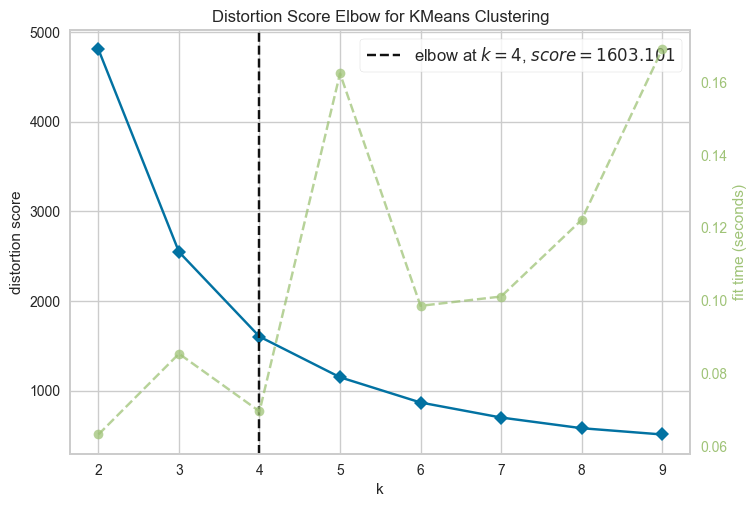

In [182]:
# Selecting the features to perform clustering.
X = df[['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']]

# Initializing KMeans with random_state 42.
km = KMeans(random_state=42)

# Initializing the KElbowVisualizer for finding out the number of cluster.
visualizer = KElbowVisualizer(km, k=(2,10))

# Fitting the data to the visualizer.
visualizer.fit(X)

# Finalizing and rendering the figure.
visualizer.show()        

# Extracting the relevant features for clustering.
features = df[['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']]

In [183]:
# Features for clustering
features = df[['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews']]

# Determines the number of clusters (k) from above elbow method.
k = 4

# Applying K-means clustering
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

# Getting the cluster labels for each data point
labels = km.labels_

# Adding the cluster labels to the original dataset
df['Cluster'] = labels

df[['Rating', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews', 'Cluster']].head()

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Cluster
0,4.5,0.552620,1.000,0.555556,1.0,0.8,1.000000,0
1,4.4,0.921051,0.750,0.555556,0.6,1.0,1.000000,0
2,4.3,0.657886,0.750,0.777778,0.8,0.6,0.666667,0
3,4.4,0.657886,0.500,1.000000,0.4,0.6,0.666667,0
4,4.2,0.842101,0.182,0.555556,0.4,0.6,0.666667,0


In [184]:
# Checking the unique clusters.
df.Cluster.unique()

array([0, 3, 1, 2])

In [185]:
# Checking the data distribution per cluster.
pd.Series(km.labels_).value_counts().sort_index()

0    6017
1    6495
2    2515
3    9364
Name: count, dtype: int64

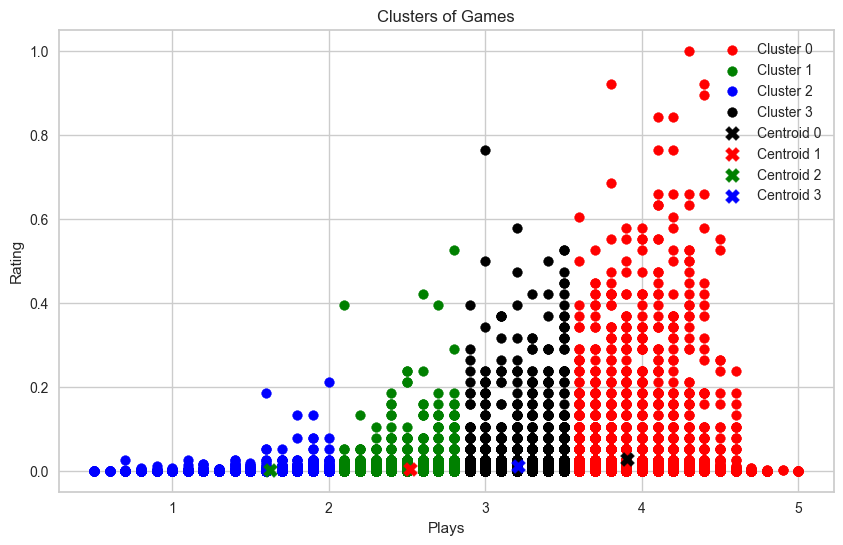

In [186]:
# Plotting the clusters.
plt.figure(figsize=(10, 6))

# Defining colors for the clusters.
colors = ['red', 'green', 'blue', 'black']

# Iterating through each cluster and plotting data points with the corresponding color.
for cluster_num in range(df['Cluster'].max() + 1):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Rating'], cluster_data['Plays'], label=f'Cluster {cluster_num}', color=colors[cluster_num])

# Plotting centroids for each cluster.
for cluster_num in range(df['Cluster'].max() + 1):
    centroid = df[df['Cluster'] == cluster_num][['Plays', 'Rating']].mean()
    plt.scatter(centroid['Rating'], centroid['Plays'], marker='X', color=colors[cluster_num-1], s=100, label=f'Centroid {cluster_num}')

plt.xlabel('Plays')
plt.ylabel('Rating')
plt.title('Clusters of Games')
plt.legend()
plt.show()